# Calculando Série Temporal

__Autoria:__ Sabrina Paes Leme P. Correa <br>
__Criação:__ 31/05/2024 <br>
__Modificação:__ 31/05/2024

__Dificuldade:__ Média <br>
__Descrição:__ Este tutorial mostra como calcular média e mediana de uma Série Temporal no Python.
<br>
<br>
__Contato:__ <br>
📧 paeslemesa@gmail.com <br>
🔗 https://www.linkedin.com/in/paeslemesa/?locale=pt_BR <br>
🐱 https://github.com/paeslemesa

## 0. Preparativos para este tutorial

✨ Antes de mais nada, precisamos ter nossos dados baixados. Caso você não saiba como fazer isso de forma simplificada, deixo aqui a sugestão do meu tutorial de como baixar séries temporais: [Tutorial decomo Baixar Séries Temporais](https://github.com/paeslemesa/tutoriaisPython/blob/main/02_Download_SerieTemporal_GEE.ipynb).


🧩 As imagens em que vamos trabalhar também já devem estar todas na mesma pasta e devem ter a mesma extensão

## 1. Importando bibliotecas e Definindo os arquivos de saida

Por incrível que pareça, este tutorial vai se basear majoritariamente em quatro bibliotecas:

* <code>rasterio</code> para ler, e escrever os rasters
* <code>numpy</code> para gente calcular as médias e medianas
* <code>os</code> para manipulação de arquivos no computador
* <code>glob</code> para pesquisar arquivos em uma pasta

In [1]:
import rasterio
import numpy as np

import os
from glob import glob

In [2]:
diretorio = r"/home/jovyan/sabrina/ECURS/LandsatSeries/2015" # diretorio onde estão as imagens


# Os nomes de saída dos arquivos são determinados aqui
nome_media_saida = os.path.join(diretorio, "media.tif") # nome do arquivo de saída
nome_std_saida = os.path.join(diretorio, "std.tif") # nome do arquivo de saída
nome_mediana_saida = os.path.join(diretorio, "mediana.tif") # nome do arquivo de saída

In [3]:
# Agora vamos listar todas as imagens do diretorio
lista_imagens = glob(os.path.join(diretorio, "*.tif")) # o operador * quer dizer "qualquer coisa", então estamos procurando "qualquer coisa" e depois que tenha ".tif" na pasta

print( "Total de imagens encontradas:", len(lista_imagens))

Total de imagens encontradas: 24


## 2. Cálculo de Série temporal por partes

🪀 Este processo será feito num loop, onde usarei o comando <code>for</code> para rodar por todas as bandas das inagens e todas as  imagens da pasta. Fiz esse fluxograma que talvez ajudem vocês a entenderem um pouquinho melhor o processo.

As imagens que estou trabalhando no momento são do senor OLI, com as bandas: __Azul, Verde, Vermelho, NIR, SWIR1, SWIR2__

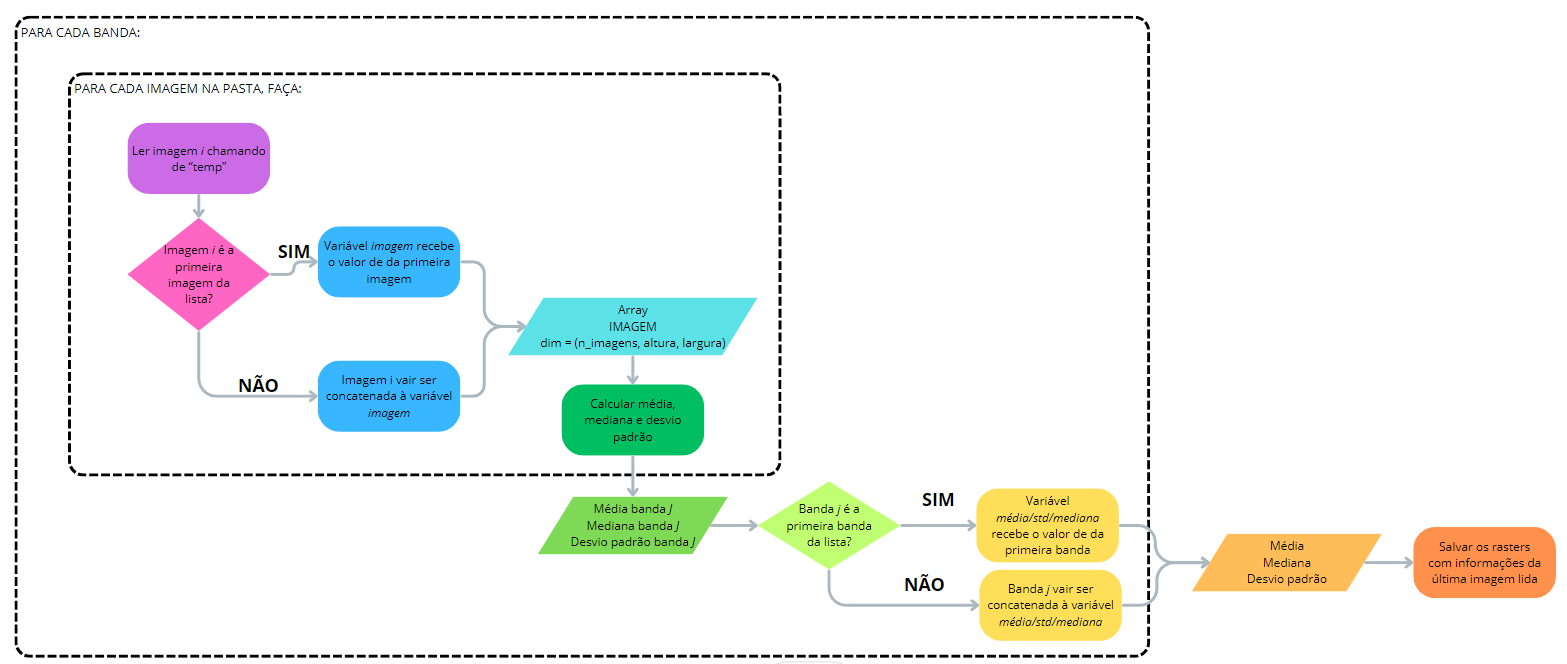

In [4]:
# Primeiro vamos criar uma lista com os nomes das bandas das imagens
nomes_bandas = ["Azul", "Verde", "Vermelho", "NIR", "SWIR1", "SWIR2"]

### 2.1. Qubrando em pedaços

🛟 Primeiro vamos calcular os valores para uma banda só para que nós possamos checar se o que estamos fazendo está dando certo, depois vamos juntar isso para todas as bandas.

In [5]:
j = 0  # usaremos primeiro a banda 0 da nossa lista de bandas, mas mais pra baixo, vamos mudar isso, ok?

for arquivo_imagem in lista_imagens:
    # lendo UMA BANDA de todas as imagens da pasta
    with rasterio.open(arquivo_imagem) as src:
        temp = src.read(j+1) # lendo a banda j+1 (pois o índice em Python começa em 0 e no Rasterio começa em 1)
        metadados = src.profile # pegando os metadados da imagem

        # Testando se o arquivo do loop é o primeiro da lista
        if arquivo_imagem == lista_imagens[0]:
            imagem = temp[np.newaxis,:,:] # Se sim, a variável imagem recebe a primeira banda da primeira imagem
            # a função "np.newaxis" é usada para adicionar uma dimensão ao array, pois a variável "imagem" é 3D ("banda j da imagens i", linhas, colunas)
        else:
            imagem = np.concatenate((imagem, temp[np.newaxis,:,:]), axis=0) # Se não, a banda lida é concatenada com a variável imagem no eixo 0

🚨 Vamos conferir se deu certo?

Para dar certo, a variável <code>imagem</code> deve ter as dimensões ($n_{imagens}, linhas, colunas$). Para isso, podemos abrir uma imagem qualquer da nossa lista e conferir.

In [6]:
with rasterio.open(arquivo_imagem) as src: # lendo o último arquivo rodado no loop
    print("Número de bandas:", src.count) # printa o número de bandas
    print("Linhas:", src.height) # printa o número de linhas
    print("Colunas:", src.width) # printa o número de colunas


Número de bandas: 6
Linhas: 464
Colunas: 1376


🧰 Agora vamos testar a nossa imagem resultante?

In [7]:
print(imagem.shape) # printa as dimensões da variável imagem

print("Numero de imagens:", imagem.shape[0]) # printa o número de imagens
print("Numero de linhas:", imagem.shape[1]) # printa o número de linhas
print("Numero de colunas:", imagem.shape[2]) # printa o número de colunas


(24, 464, 1376)
Numero de imagens: 24
Numero de linhas: 464
Numero de colunas: 1376


💯 Opa! Parece que está tudo certinho! <br>
Temos 21 imagens no nosso diretório e a imagem realmente tem 464 linhas e 1376 colunas. Podemos então calcular as estatísticas desse array!

### 2.2.1 Calculando as estatísticas dessa banda

💥 Devemos ter em mente que a variável <code>imagem</code> quer dizer a junção todas as bandas 0 (Azul) que estão ali na pasta e precisamos transformar isso numa banda só. Então vamos calcular média, mediana e o desvio padrão (std) desse array <code>imagem</code>.

🔦 Precisamos prestar atenção que estamos calculando a média de __cada pixel__ das 21 imagens, então vamos selecionar que estamos calculando as estatísticas no __eixo 0__.

In [8]:
media_bandaJ = np.nanmean(imagem, axis=0) # calcula a média da banda j
std_bandaJ = np.nanstd(imagem, axis=0) # calcula o desvio padrão da banda j
mediana_bandaJ = np.nanmedian(imagem, axis=0) # calcula a mediana da banda j

Para conferir se estamos fazendo tudo certinho, vamos printar as dimensões (<code>.shape</code>) das nossas estatíscias. E parece estar tudo certinho.

In [9]:
print(media_bandaJ.shape) # printa as dimensões da variável media_bandaJ
print(std_bandaJ.shape) # printa as dimensões da variável std_bandaJ
print(mediana_bandaJ.shape) # printa as dimensões da variável mediana_bandaJ

(464, 1376)
(464, 1376)
(464, 1376)


💡 Agora, tudo o que falta é concatenar esse valor médio/mediano/desvio padrão com os metadados da imagem e salvar o arquivo final.

## 3. Calulando a série temporal de todas as bandas

⚙️ Agora a gente vai pegar o comando <code>for</code> ali de cima e colocar ele dentro de outro comando <code>for</code> para rodar tudo de uma vez só.

Observe que agora não estamos mais definindo o <code>j=0</code>, porque $j$ vai variar de 0 até 5.

In [10]:
for j, banda in enumerate(nomes_bandas): # vamos usar a função "enumerate" para pegar o índice e o valor da lista ao mesmo tempo
    print("Calculando banda:", banda)
    # PEDAÇO QUE JÁ TINHAMOS PRONTO
    #--------------------------------------------------------------------------------------------
    for arquivo_imagem in lista_imagens:
        # lendo UMA BANDA de todas as imagens da pasta
        with rasterio.open(arquivo_imagem) as src:
            temp = src.read(j+1) # lendo a banda j+1 (pois o índice em Python começa em 0 e no Rasterio começa em 1)
            metadados = src.profile # pegando os metadados da imagem

            # Testando se o arquivo do loop é o primeiro da lista
            if arquivo_imagem == lista_imagens[0]:
                imagem = temp[np.newaxis,:,:] # Se sim, a variável imagem recebe a primeira banda da primeira imagem
                # a função "np.newaxis" é usada para adicionar uma dimensão ao array, pois a variável "imagem" é 3D ("banda j da imagens i", linhas, colunas)
            else:
                imagem = np.concatenate((imagem, temp[np.newaxis,:,:]), axis=0) # Se não, a banda lida é concatenada com a variável imagem no eixo 0
    
    media_bandaJ = np.nanmean(imagem, axis=0) # calcula a média da banda j
    std_bandaJ = np.nanstd(imagem, axis=0) # calcula o desvio padrão da banda j
    mediana_bandaJ = np.nanmedian(imagem, axis=0) # calcula a mediana da banda j
    #--------------------------------------------------------------------------------------------

    # Agora precisamos testar se estamos trabalhando com a banda 0 para criar as varáveis "média", "mediana" e "std"

    if j == 0: # Se a banda for a primeira
        media = media_bandaJ[np.newaxis,:,:] # Se sim, a variável media recebe a média da banda j
        std = std_bandaJ[np.newaxis,:,:] # Se sim, a variável std recebe o desvio padrão da banda j
        mediana = mediana_bandaJ[np.newaxis,:,:] # Se sim, a variável mediana recebe a mediana da banda j
    else: # para todos os demais casos (else = se não)
        media = np.concatenate((media, media_bandaJ[np.newaxis,:,:]), axis=0)
        std = np.concatenate((std, std_bandaJ[np.newaxis,:,:]), axis=0)
        mediana = np.concatenate((mediana, mediana_bandaJ[np.newaxis,:,:]), axis=0)

Calculando banda: Azul
Calculando banda: Verde
Calculando banda: Vermelho
Calculando banda: NIR
Calculando banda: SWIR1
Calculando banda: SWIR2


## 3. Salvando as imagens

🔓 Uma coisa que eu gosto muito de fazer é dar os nomes das bandas nas imagens que salvo para não precisar lembrar depois, por isso determinei ali os nomes das bandas. A gente costuma fazer isso no momento em que salvamos as imagens.

🔑 Para salvar uma imagem com o <code>rasterio</code> a principio pode parecer complicado, mas calma! A gente consegue!


✳️ Para salvar uma imagem com o rasterio, a gente precisar "criar um arquivo" em branco e falar pro programa que vamos escrever nele. Depois, mostramos para o rasterio quais são os parâmetros da nossa imagem (número de linhas, colunas, transformação, CRS, etc.). Por fim, nós escrevemos banda por banda nesse arquivo, para poder colocar o nome da banda.

⛓️ Dessa forma: <br>
* A gente vai "abrir o raster em branco" como se estivéssemos abrindo um raster normal, e vamos assinalar o comando <code>'w'</code> (do inglês, _write_, escrever).
* Depois vamos usar o comando <code>**</code>para que a gente não precise passar parâmetro por parâmetro, ele vai alocar "sozinho"
* Vamos escrever banda por banda do raster com o <code>dst.write</code> assinalando qual é o array que vai entrar em cada banda
* Por fim, vamos determinação a descrição de cada banda com o comando  <code>dst.set_band_description</code>.

Lembrando que as variáveis de saída já foram determinadas lá em cima como:
* nome_media_saida
* nome_std_saida
* nome_mediana_saida

In [11]:
# Aqui estamos pegando os metadasdos da última imagem no comando for para copiar essas informações
with rasterio.open(arquivo_imagem) as src:
    metadados = src.profile

metadados

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 1376, 'height': 464, 'count': 6, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00026949458523585647, 0.0, -108.3939561168843,
       0.0, -0.00026949458523585647, 57.07544972334633), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

Se formos observar, não precisamos alterar nenhuma informação dos metadados, porque:
* O número de bandas é o mesmo
* Os tamanhos das linhas e colunas são os mesmos
* O tipo dos valores (float) são os mesmo
* O CRS é o mesmo
Na verdade, é tudo o mesmo, tirando os próprios valores das bandas (que não ficam nos metadados).

In [12]:
# Salvando o valor da média
with rasterio.open(nome_media_saida, 'w', **metadados) as dst:
    for i, band in enumerate(nomes_bandas):
        dst.write(media[i], i+1)
        dst.set_band_description(i+1, band)
print("Média salva com sucesso!")

# Salvando o valor do desvio padrão
with rasterio.open(nome_std_saida, 'w', **metadados) as dst:
    for i, band in enumerate(nomes_bandas):
        dst.write(std[i], i+1)
        dst.set_band_description(i+1, band)
print("Desvio padrão salvo com sucesso!")

# Salvando o valor da mediana
with rasterio.open(nome_mediana_saida, 'w', **metadados) as dst:
    for i, band in enumerate(nomes_bandas):
        dst.write(mediana[i], i+1)
        dst.set_band_description(i+1, band)        
print("Mediana salva com sucesso!")

Média salva com sucesso!
Desvio padrão salvo com sucesso!
Mediana salva com sucesso!


Se abrirmos essas imagens no QGIS, poderemos checar os nomes das bandas e os valores, além de conferir se está tudo certinho.

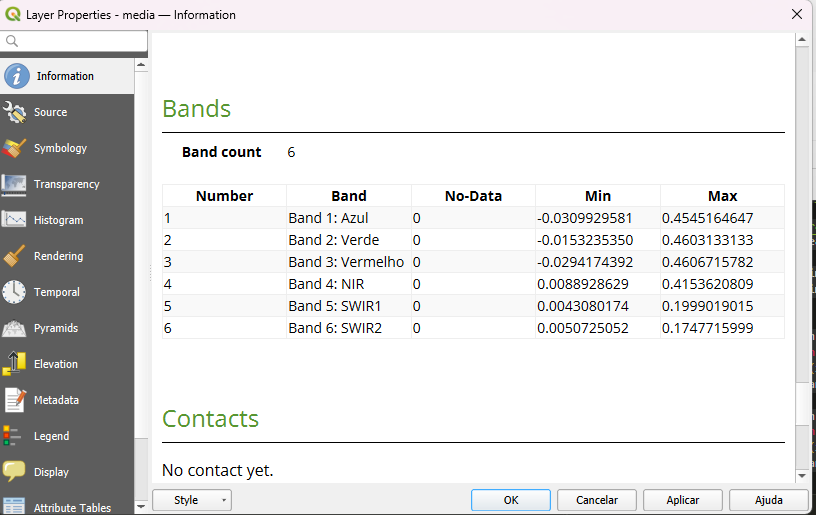